In [2]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\logan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\logan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\logan\AppData\Roaming\nltk_data...


True

In [3]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\logan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\logan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\logan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Load and Preprocess Data with NLTK

In [4]:
# Load Data
data = pd.read_csv('Samsung_Galaxy_S22_5G_Mobile_P.csv')

# Handle missing values and duplicates
data.dropna(inplace=True)
data.drop_duplicates(inplace=True)


## Preprocess Text Using NLTK

In [5]:
# Initialize NLTK tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Function to preprocess text
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stop words and lemmatize
    filtered_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(filtered_tokens)

# Apply preprocessing to the review text
data['Cleaned_Review'] = data['Review'].apply(preprocess_text)


In [6]:
data

,Author,Rating,Title,Review,Date,Cleaned_Review
0,ronz,5,Superb phone and exceptional camera.,"Delivery was excellent, it was very well packa...",6 April 2024,delivery excellent well packaged phone perfect...
1,W. Davies,5,A step up from my S20,"My S20 was/is fine, apart from battery life no...",4 May 2024,s20 wasis fine apart battery life great new fa...
2,Manole Danut,4,"Good phone, mediocre battery.",The overall product is good. When opening the ...,25 July 2022,overall product good opening box get phone 1 m...
3,Tilly,5,My new phone,I am really happy with my upgrade.\nThe camera...,1 June 2024,really happy upgrade camera video feature bril...
4,Sean H,5,"Sleek Design, Powerful Performance: Samsung Ga...",The Samsung Galaxy S22 5G in Phantom White is ...,14 March 2024,samsung galaxy s22 5g phantom white stunning s...
...,...,...,...,...,...,...
95,Erjon Koci,2,I love that phone. But the battery was very bad,Everything ok except battery life,10 August 2022,everything ok except battery life
96,Christian,1,Terrible,1. The screen got scratched within 2 months of...,12 May 2022,1 screen got scratched within 2 month use idea...
97,acx786,1,"Broken seal, phone replaced, all Samsung items...","Broken seal, phone replaced, all Samsung items...",21 June 2023,broken seal phone replaced samsung item missing
98,Perfect and simple tools for the job. Nomore p...,5,Great picture and functions,The phone has high quality pics. On the batter...,29 December 2023,phone high quality pic battery l removed save ...


## Exploratory Data Analysis (EDA)

count    100.000000
mean       3.860000
std        1.557128
min        1.000000
25%        3.000000
50%        5.000000
75%        5.000000
max        5.000000
Name: Rating, dtype: float64


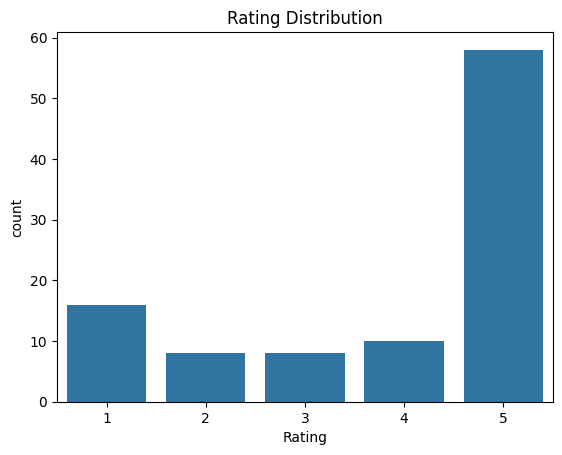

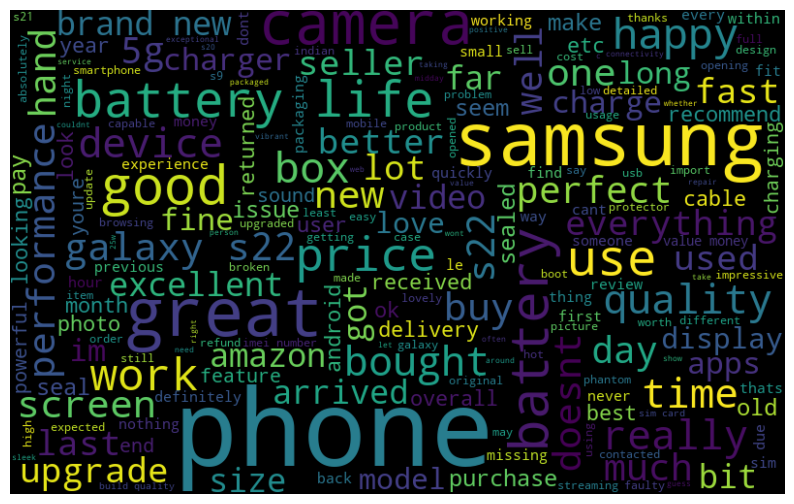

In [7]:
# Summary statistics
print(data['Rating'].describe())

# Rating distribution
sns.countplot(x='Rating', data=data)
plt.title('Rating Distribution')
plt.show()

# Word Cloud for all reviews
all_words = ' '.join([text for text in data['Cleaned_Review']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## Sentiment Labeling

In [9]:
def label_sentiment(rating):
    if rating >= 4:
        return 'positive'
    elif rating <= 2:
        return 'negative'
    else:
        return 'neutral'

data['Sentiment'] = data['Rating'].apply(label_sentiment)

In [10]:
data

,Author,Rating,Title,Review,Date,Cleaned_Review,Sentiment
0,ronz,5,Superb phone and exceptional camera.,"Delivery was excellent, it was very well packa...",6 April 2024,delivery excellent well packaged phone perfect...,positive
1,W. Davies,5,A step up from my S20,"My S20 was/is fine, apart from battery life no...",4 May 2024,s20 wasis fine apart battery life great new fa...,positive
2,Manole Danut,4,"Good phone, mediocre battery.",The overall product is good. When opening the ...,25 July 2022,overall product good opening box get phone 1 m...,positive
3,Tilly,5,My new phone,I am really happy with my upgrade.\nThe camera...,1 June 2024,really happy upgrade camera video feature bril...,positive
4,Sean H,5,"Sleek Design, Powerful Performance: Samsung Ga...",The Samsung Galaxy S22 5G in Phantom White is ...,14 March 2024,samsung galaxy s22 5g phantom white stunning s...,positive
...,...,...,...,...,...,...,...
95,Erjon Koci,2,I love that phone. But the battery was very bad,Everything ok except battery life,10 August 2022,everything ok except battery life,negative
96,Christian,1,Terrible,1. The screen got scratched within 2 months of...,12 May 2022,1 screen got scratched within 2 month use idea...,negative
97,acx786,1,"Broken seal, phone replaced, all Samsung items...","Broken seal, phone replaced, all Samsung items...",21 June 2023,broken seal phone replaced samsung item missing,negative
98,Perfect and simple tools for the job. Nomore p...,5,Great picture and functions,The phone has high quality pics. On the batter...,29 December 2023,phone high quality pic battery l removed save ...,positive


## Feature Engineering with TF-IDF

In [11]:
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(data['Cleaned_Review']).toarray()
y = data['Sentiment']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Selection and Training

In [13]:
# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 0  0  8]
 [ 0  0  2]
 [ 0  0 10]]
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         8
     neutral       0.00      0.00      0.00         2
    positive       0.50      1.00      0.67        10

    accuracy                           0.50        20
   macro avg       0.17      0.33      0.22        20
weighted avg       0.25      0.50      0.33        20



c:\Users\logan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\logan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\logan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

## Detailed Sentiment Words Analysis

In [14]:
def get_word_frequencies(reviews):
    all_words = ' '.join(reviews['Cleaned_Review']).split()
    word_freq = Counter(all_words)
    return word_freq.most_common(20)

positive_reviews = data[data['Sentiment'] == 'positive']
negative_reviews = data[data['Sentiment'] == 'negative']
neutral_reviews = data[data['Sentiment'] == 'neutral']

positive_word_freq = get_word_frequencies(positive_reviews)
negative_word_freq = get_word_frequencies(negative_reviews)
neutral_word_freq = get_word_frequencies(neutral_reviews)

print("Positive reviews common words:", positive_word_freq)
print("Negative reviews common words:", negative_word_freq)
print("Neutral reviews common words:", neutral_word_freq)


Positive reviews common words: [('phone', 66), ('great', 29), ('battery', 20), ('samsung', 20), ('camera', 16), ('good', 15), ('new', 13), ('happy', 12), ('price', 12), ('s22', 10), ('perfect', 9), ('life', 9), ('quality', 9), ('like', 8), ('excellent', 7), ('would', 7), ('fast', 7), ('use', 7), ('day', 7), ('much', 7)]
Negative reviews common words: [('phone', 27), ('samsung', 11), ('battery', 8), ('use', 8), ('used', 6), ('bought', 6), ('buy', 5), ('work', 5), ('get', 5), ('box', 5), ('amazon', 5), ('sim', 5), ('back', 4), ('one', 4), ('time', 4), ('really', 4), ('screen', 4), ('could', 4), ('pay', 4), ('seal', 4)]
Neutral reviews common words: [('s22', 8), ('device', 8), ('galaxy', 7), ('battery', 7), ('samsung', 6), ('performance', 6), ('phone', 5), ('life', 5), ('camera', 5), ('35', 4), ('quality', 4), ('display', 4), ('5g', 3), ('impressive', 3), ('build', 3), ('powerful', 3), ('user', 3), ('update', 3), ('upgrade', 3), ('may', 3)]


## Visualizing Word Frequencies

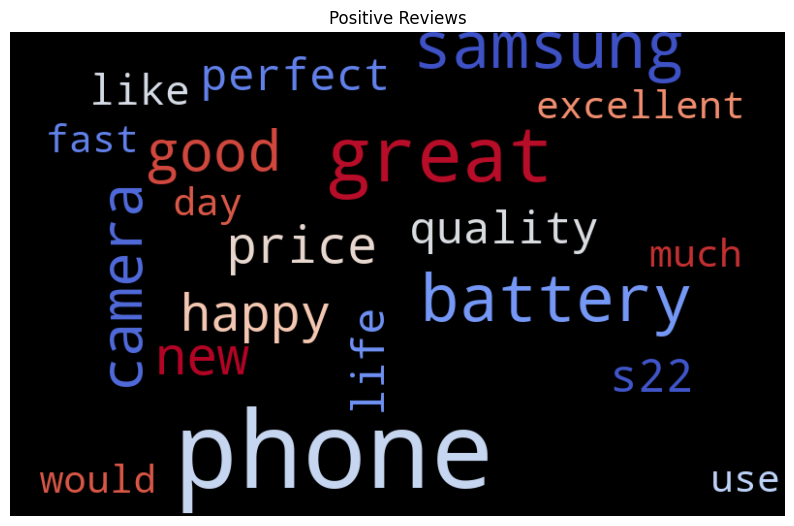

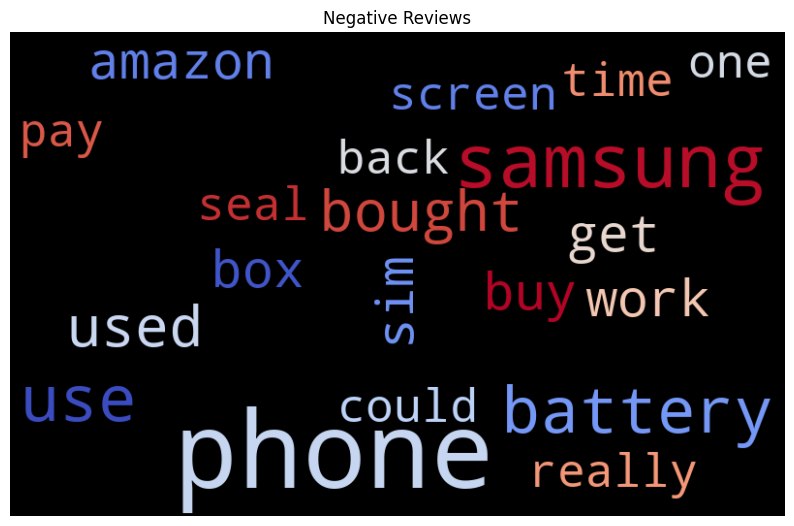

In [16]:
def plot_wordcloud(word_freq, title):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, colormap='coolwarm').generate_from_frequencies(dict(word_freq))
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(title)
    plt.axis('off')
    plt.show()

plot_wordcloud(positive_word_freq, 'Positive Reviews')
plot_wordcloud(negative_word_freq, 'Negative Reviews')

## Detailed Analysis of Negative Reviews

In [20]:
# Example analysis
negative_reviews['Review'].str.contains('battery').sum()  # Count mentions of 'battery'
# negative_reviews['Review'].str.contains('camera').sum()  # Count mentions of 'camera'

5

## Sentiment Drivers

In [21]:
def sentiment_driver_analysis(reviews, keywords):
    keyword_counts = {}
    for keyword in keywords:
        keyword_counts[keyword] = reviews['Review'].str.contains(keyword).sum()
    return keyword_counts

positive_keywords = ['camera', 'performance', 'design', 'value', 'fast']
negative_keywords = ['battery', 'charger', 'expensive', 'slow', 'issue']

positive_drivers = sentiment_driver_analysis(positive_reviews, positive_keywords)
negative_drivers = sentiment_driver_analysis(negative_reviews, negative_keywords)

print("Positive sentiment drivers:", positive_drivers)
print("Negative sentiment drivers:", negative_drivers)

Positive sentiment drivers: {'camera': 13, 'performance': 2, 'design': 2, 'value': 6, 'fast': 8}
Negative sentiment drivers: {'battery': 5, 'charger': 2, 'expensive': 0, 'slow': 0, 'issue': 1}


## Visualizing Sentiment Drivers

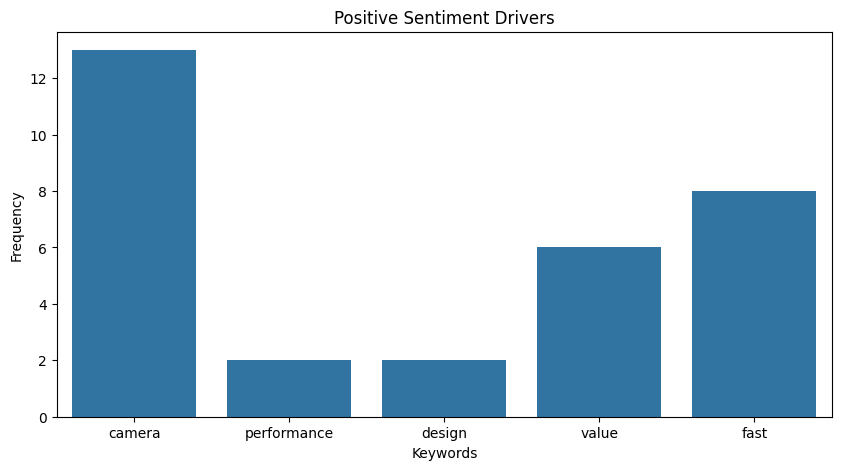

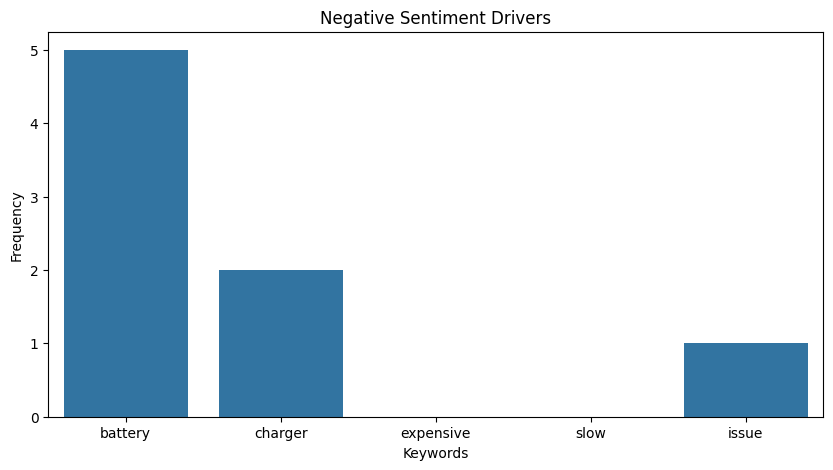

In [22]:
def plot_sentiment_drivers(drivers, title):
    plt.figure(figsize=(10, 5))
    sns.barplot(x=list(drivers.keys()), y=list(drivers.values()))
    plt.title(title)
    plt.xlabel('Keywords')
    plt.ylabel('Frequency')
    plt.show()

plot_sentiment_drivers(positive_drivers, 'Positive Sentiment Drivers')
plot_sentiment_drivers(negative_drivers, 'Negative Sentiment Drivers')